In [1]:
# import required libraries 

import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

import statsmodels 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler , MinMaxScaler 
from sklearn.feature_selection import RFE

In [2]:
media = pd.read_csv(r'E:\Machine Learning\Media Company Case Study\mediacompany.csv')
media = media.drop('Unnamed: 7',axis = 1) 
media.head()


,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [3]:
media.shape

(80, 7)

In [4]:
# lets check the dtypes 
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [5]:
# chenge the data type of column 'Date' from object to datetime 
media['Date'] = media['Date'].astype('datetime64')

In [6]:
# Deriving "days since the show started"
d0 = pd.Timestamp('2017-02-28 00:00:00', tz=None)
d1 = media.Date
delta = d1 - d0
media['day']= delta 
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [7]:
# Cleaning days
media['day'] = media['day'].astype(str)
media['day'] = media['day'].map(lambda x: x[0:2])
media['day'] = media['day'].astype(int)

In [8]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


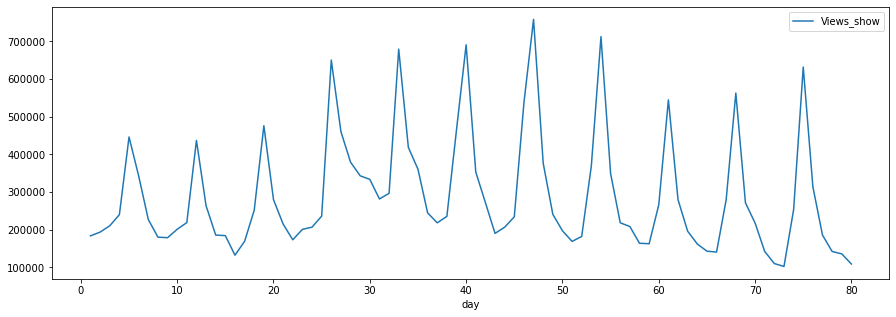

In [9]:
plt.rcParams["figure.figsize"] = (15,5) 
#plt.figure(figsize=((10,8))) #this also work but with a message like <Figure size 720x576 with 0 Axes>
media.plot(x='day', y='Views_show') 
plt.show() 

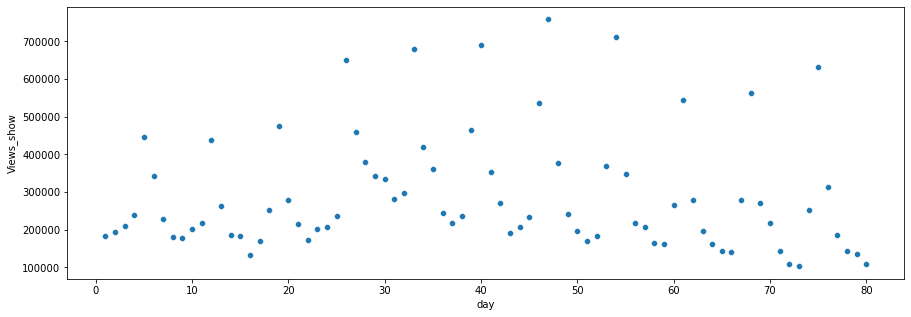

In [10]:
sns.scatterplot(data=media,x='day' , y='Views_show' ) 
plt.show()

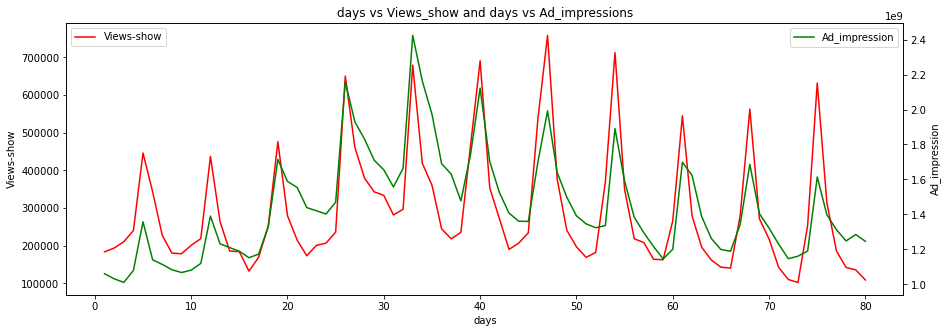

In [11]:
# plot for days vs Views_show and days vs Ad_impressions
fig, ax = plt.subplots()
ax.plot(media.day,media.Views_show, color='red',label='Views-show')
#ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('Views-show')
ax.set_xlabel('days') 
ax.set_title('days vs Views_show and days vs Ad_impressions')
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
ax2.plot(media.day,media.Ad_impression, color='green',label = 'Ad_impression')
#ax2.tick_params(axis='y', labelcolor='green') #optional you can set the y_label range color 
ax2.set_ylabel('Ad_impression')
ax2.legend(loc = 'upper right')
plt.show()

In [12]:
# make a weekday column which have monday as 1 and sunday as 7 
media['weekday']=pd.DatetimeIndex(media['Date']).dayofweek+1  
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,3
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,4
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,5
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,6
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,7


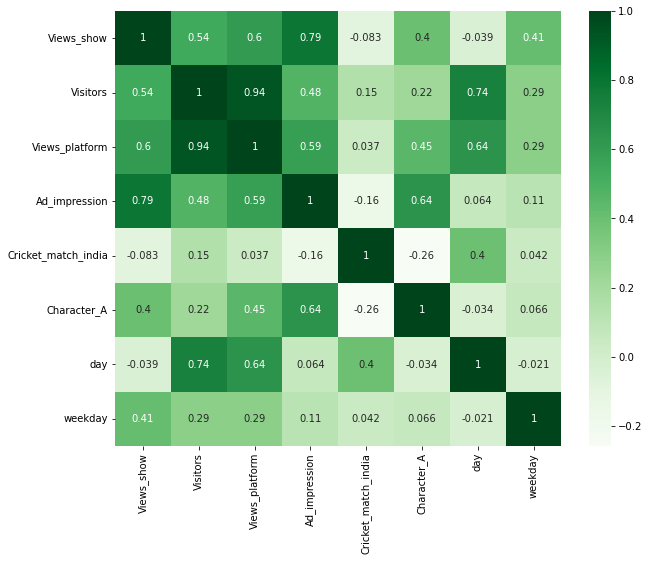

In [13]:
plt.rcParams["figure.figsize"] = (10,8) 
sns.heatmap(media.corr(),cmap='Greens',annot=True) 
plt.show()

In [14]:
# make a weekend column 
media['weekend']=media['weekday'].apply(lambda x:1 if (x==6 or x==7) else 0) 
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,3,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,4,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,5,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,6,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,7,1


In [15]:
# drop weekday because we dont need that 
media.drop('weekday',axis=1,inplace=True)

In [16]:
# now lets do salling 
numerical_predictors = ['Views_show','Visitors','Views_platform','Ad_impression'] 
scaler = StandardScaler() 
media[numerical_predictors]=scaler.fit_transform(media[numerical_predictors]) 
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekend
0,2017-03-01,-0.689591,-1.910417,-1.781967,-1.286948,0,0,1,0
1,2017-03-02,-0.624474,-1.865434,-1.836370,-1.384819,0,0,2,0
2,2017-03-03,-0.515895,-1.962854,-1.713997,-1.455587,0,0,3,0
3,2017-03-04,-0.323746,-0.897457,-1.267762,-1.225102,1,0,4,1
4,2017-03-05,1.015968,-0.454290,-0.625104,-0.285503,0,0,5,1


In [17]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekend
count,8.000000e+01,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,80.0000,80.000000
mean,-8.326673e-18,-1.210837e-16,-2.848416e-16,-3.552714e-16,0.100000,0.375000,40.5000,0.275000
std,1.006309e+00,1.006309e+00,1.006309e+00,1.006309e+00,0.301893,0.487177,23.2379,0.449331
min,-1.217142e+00,-1.962854e+00,-1.836370e+00,-1.455587e+00,0.000000,0.000000,1.0000,0.000000
25%,-6.790993e-01,-6.456023e-01,-7.308001e-01,-7.909052e-01,0.000000,0.000000,20.7500,0.000000
50%,-3.513775e-01,-9.704718e-04,1.336360e-02,-1.903981e-01,0.000000,0.000000,40.5000,0.000000
75%,3.908750e-01,5.173063e-01,5.748596e-01,6.410625e-01,0.000000,1.000000,60.2500,1.000000
max,3.044620e+00,2.810457e+00,2.908291e+00,3.311975e+00,1.000000,1.000000,80.0000,1.000000


In [18]:
# also drop date and day 
media_dummy = media[['Views_show','Visitors','Views_platform','Ad_impression','Cricket_match_india'
                    ,'Character_A','weekend']]

In [19]:
media_dummy.head()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,weekend
0,-0.689591,-1.910417,-1.781967,-1.286948,0,0,0
1,-0.624474,-1.865434,-1.836370,-1.384819,0,0,0
2,-0.515895,-1.962854,-1.713997,-1.455587,0,0,0
3,-0.323746,-0.897457,-1.267762,-1.225102,1,0,1
4,1.015968,-0.454290,-0.625104,-0.285503,0,0,1


In [20]:
lm=LinearRegression() 
y = media_dummy.pop('Views_show')
X = media_dummy
lm.fit(X,y) 
rfe = RFE(lm,3)             
rfe = rfe.fit(X, y)

In [21]:
list(zip(X.columns,rfe.support_,rfe.ranking_))

[('Visitors', False, 3),
 ('Views_platform', False, 2),
 ('Ad_impression', True, 1),
 ('Cricket_match_india', False, 4),
 ('Character_A', True, 1),
 ('weekend', True, 1)]

In [22]:
col = X.columns[rfe.support_] 
col

Index(['Ad_impression', 'Character_A', 'weekend'], dtype='object')

In [23]:
# lets now make a model with these predictors
X_rfe = X[col] 
X_rfe = sm.add_constant(X_rfe) 
lm = sm.OLS(y , X_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.05e-26
Time:                        20:20:55   Log-Likelihood:                -48.605
No. Observations:                  80   AIC:                             105.2
Df Residuals:                      76   BIC:                             114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1970      0.084     -2.354

In [24]:
# lets check the vif also 
# define a function for calculating VIF
def VIF(X):
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    X=X.drop('const',axis=1)
    Vif={} 
    count=0
    for i in X.columns:
        Vif[i] = round(variance_inflation_factor(X.values  , count) ,2)
        count+=1
    Vif = pd.DataFrame(list(Vif.items()),columns=['Features','VIF']).sort_values('VIF',ascending=False) 
    return Vif


In [25]:
VIF(X_rfe)

,Features,VIF
1,Character_A,1.48
0,Ad_impression,1.37
2,weekend,1.19


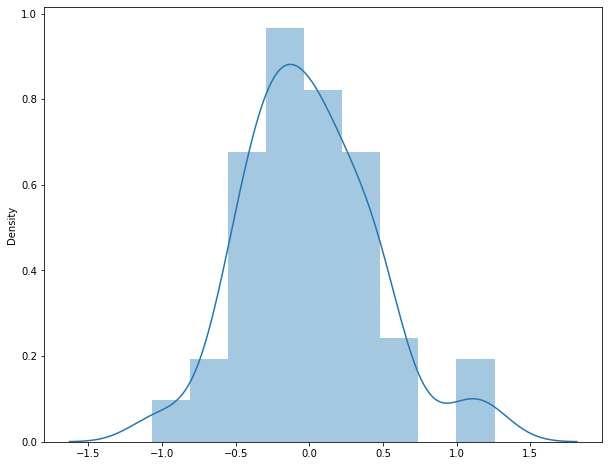

In [26]:
#checking the significance of error terms  
y_pred = lm.predict(X_rfe) 
res = y - y_pred 
sns.distplot(res) 
plt.show()

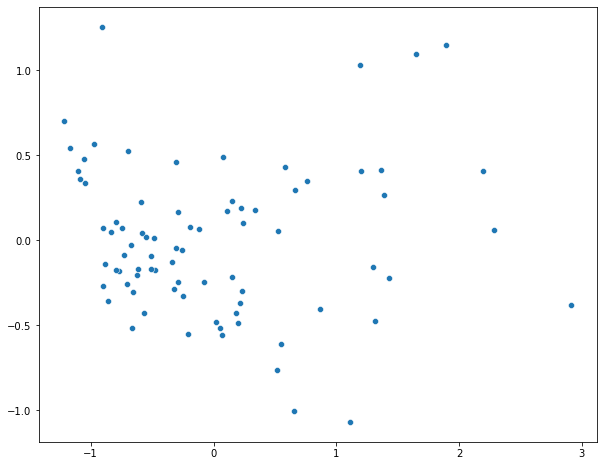

In [27]:
sns.scatterplot(y_pred,res)
plt.show()

#### observation 
<li>Vif of all the columns are below 5 so Vif for all columns are significant</li>
<li>But p-value of Character_A is > 0.05 so its not significant lets drop this</li>

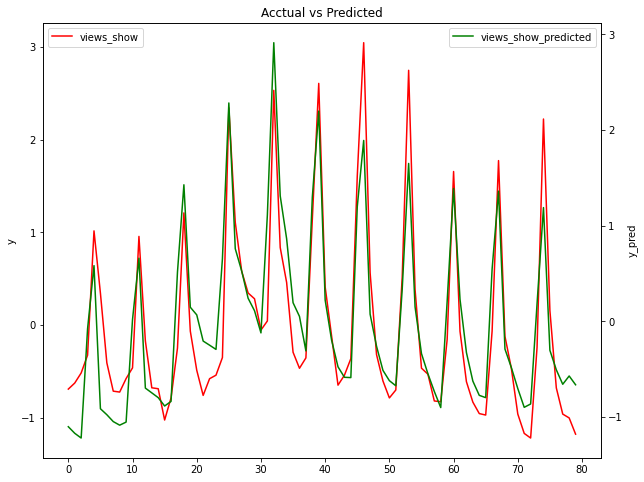

In [28]:
## before droping the variable 'Character_A' lets visualize that how the model predict 
 
fig, ax = plt.subplots()
ax.plot(y, color='red',label='views_show')
#ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('y')
#ax.set_xlabel('days') 
ax.set_title('Acctual vs Predicted')
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
ax2.plot(y_pred, color='green',label = 'views_show_predicted')
#ax2.tick_params(axis='y', labelcolor='green') #optional you can set the y_label range color 
ax2.set_ylabel('y_pred')
ax2.legend(loc = 'upper right')
plt.show()

In [29]:
# dropping 'Character_A' and make another model  
X_rfe_new = X_rfe.drop('Character_A',axis=1)  
#lr_1 = sm.add_constant(lr_1) 
lm = sm.OLS(y , X_rfe_new).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     151.7
Date:                Wed, 29 Jun 2022   Prob (F-statistic):           1.95e-27
Time:                        20:20:56   Log-Likelihood:                -49.615
No. Observations:                  80   AIC:                             105.2
Df Residuals:                      77   BIC:                             112.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2770      0.061     -4.525

In [30]:
VIF(X_rfe_new)

,Features,VIF
0,Ad_impression,1.09
1,weekend,1.09


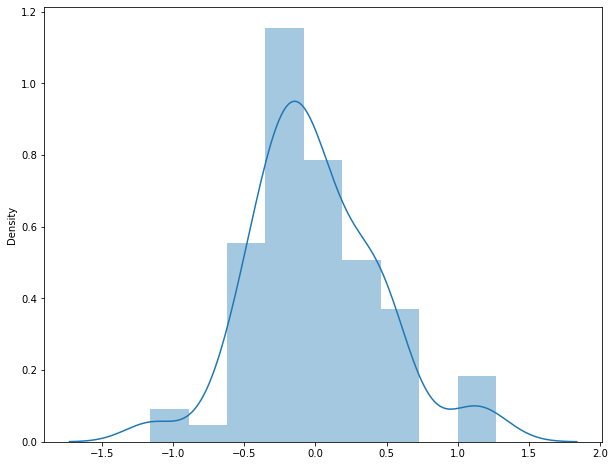

In [31]:
# chcking the significance of residual 
#X_rfe_new = sm.add_constant(X_rfe_new)
y_pred = lm.predict(X_rfe_new) 
res = y - y_pred 
sns.distplot(res) 
plt.show()

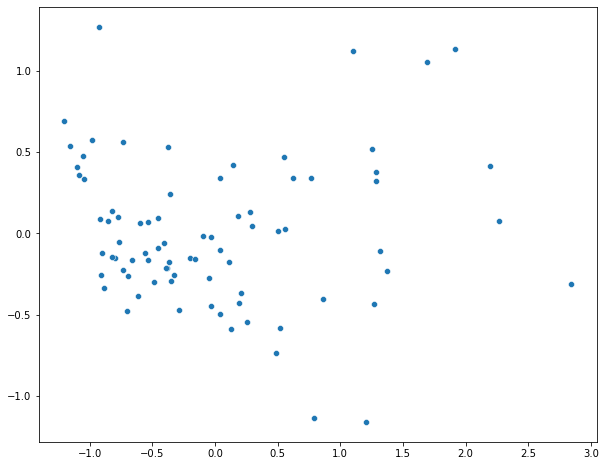

In [32]:
sns.scatterplot(y_pred,res)
plt.show()

### observation 
<li>Error terms are normally distributed with mean zero</li> 
<li>Also having constant varience </li> 
<li>there is no pattern seems in error terms all  points are scattered randomly </li> 

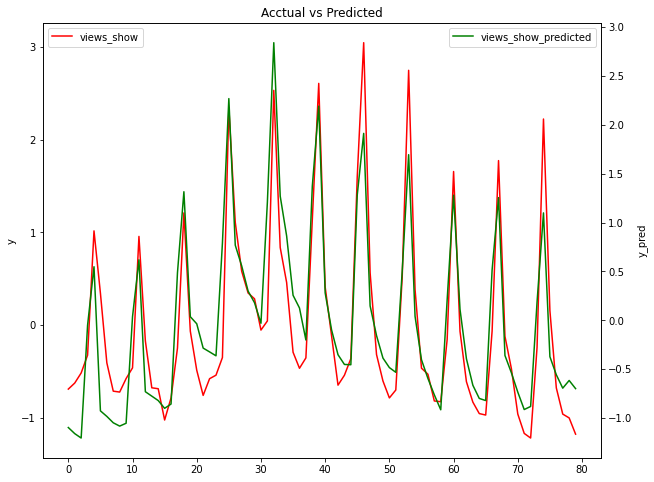

In [33]:
# plot for days vs Views_show and days vs Ad_impressions
fig, ax = plt.subplots()
ax.plot(y, color='red',label='views_show')
#ax.tick_params(axis='y', labelcolor='red')
ax.set_ylabel('y')
#ax.set_xlabel('days') 
ax.set_title('Acctual vs Predicted')
ax.legend(loc = 'upper left')
ax2 = ax.twinx()
ax2.plot(y_pred, color='green',label = 'views_show_predicted')
#ax2.tick_params(axis='y', labelcolor='green') #optional you can set the y_label range color 
ax2.set_ylabel('y_pred')
ax2.legend(loc = 'upper right')
plt.show()

***observation*** 
- we can clearly see that the actual and predicted views_show are highly overlapping each other thats mean our model prediction was pretty well .

final linear regrassion equation is  : 
    
    Views_show = -0.277 + 0.637*Ad_impression + 1.007*weekend 
